In [1]:
# Import Notebook theme

# import jtplot module in notebook
from jupyterthemes import jtplot

jtplot.style()

# # choose which theme to inherit plotting style from
# # onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
# jtplot.style(theme='oceans16')

# # set "context" (paper, notebook, talk, poster)
# # scale font-size of ticklabels, legend, etc.
# # remove spines from x and y axes and make grid dashed
# jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# ## turn on X- and Y-axis tick marks (default=False)
# ## turn off the axis grid lines (default=True)
# ## and set the default figure size
# jtplot.style(ticks=True, grid=True, figsize=(6, 4.5))

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# density of freswater
rho_w = 998  # kg/m3

# bucket mass and water level data
mass_data = [(0, 11.5), (0.264, 12.0), (0.776, 13.1), (1.258, 14.05), (1.768, 15.05), (2.24, 16.0), (2.77, 17.1),
             (3.236, 18.0), (3.716, 18.95), (4.206, 20.0), (4.744, 20.95)]


# pump rate and water level data
pump_rate = {100: [(0, 20.95), (10, 20.85), (30, 20.7), (60, 20.4), (90, 20.0), (120, 19.8), (150, 19.6), (180, 19.3)],
             200: [(0, 19.1), (30, 18.6), (60, 18.1), (90, 17.5), (120, 17.0), (150, 16.5)],
             300: [(0, 16.1), (20, 15.5), (40, 15.0), (60, 14.45), (80, 13.8), (100, 13.2), (120, 12.6)],
             400: [(0, 19.5), (20, 18.7), (40, 17.9), (60, 17.1), (80, 16.3), (100, 15.4), (120, 14.6)],
             150: [(0, 14.2), (30, 13.8), (60, 13.3), (90, 12.9), (120, 12.4), (150, 11.9), (180, 11.5)]}

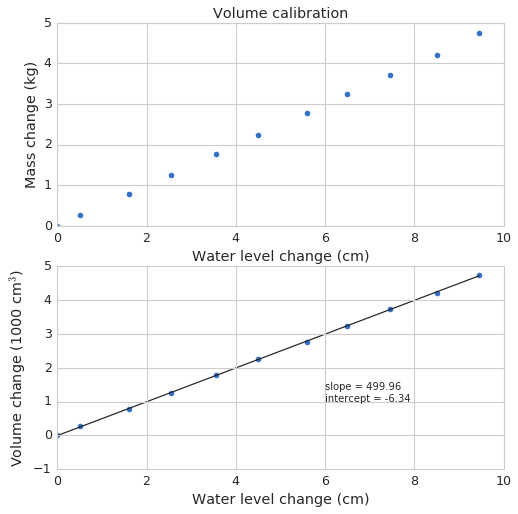

In [3]:
# get volume change from mass data
mass_data = np.array(mass_data)
dh1_bucket_cm = mass_data[:, 1] - mass_data[0, 1]  # cm
dmass_kg = mass_data[:, 0]  # kg
dvol_m3 = dmass_kg/rho_w  # m3
dvol_cm3 = dvol_m3*(100**3)  # cm3

# get vol change as linear function of water level
a1, b1, _, _, _ =stats.linregress(dh1_bucket_cm, dvol_cm3)
dvol_fit_cm3 = dh1_bucket_cm*a1 + b1

plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.plot(dh1_bucket_cm, dmass_kg, 'o')
plt.xlabel("Water level change (cm)")
plt.ylabel("Mass change (kg)")
plt.title("Volume calibration")
plt.grid(True)

plt.subplot(212)
plt.plot(dh1_bucket_cm, dvol_cm3/1000, 'o', color='b')
plt.plot(dh1_bucket_cm, dvol_fit_cm3/1000, '-', color='k')
plt.text(6, 1, "slope = %.2f\nintercept = %.2f" %(a1, b1))
plt.xlabel("Water level change (cm)")
plt.ylabel("Volume change (1000 cm$^3$)")
plt.grid(True)

(0, 200)

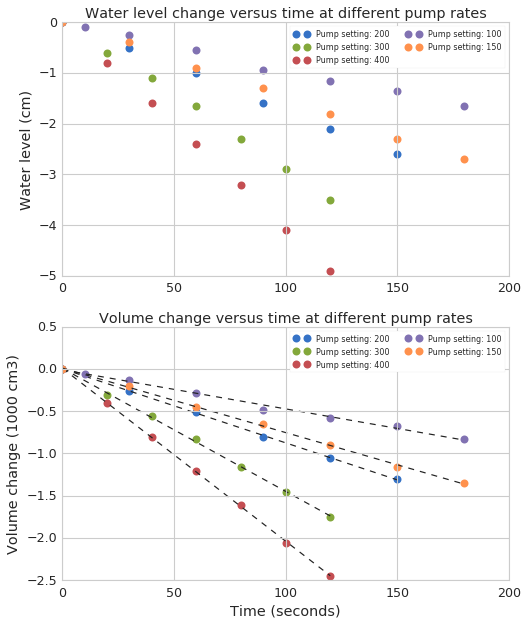

In [7]:
# plot water level versus time for different pump rates
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
axes = axes.flatten()
vol_flux = []
pump_setting = []
for i, val in pump_rate.items():

    val = np.array(val)
    time = val[:, 0]
    dh2_bucket_cm = val[:, 1] - val[0, 1]
    dvol2_bucket_cm3 = dh2_bucket_cm*a1 + b1

    axes[0].plot(time, dh2_bucket_cm, 'o', markersize=8, label="Pump setting: %s" % i)
    im = axes[1].plot(time, dvol2_bucket_cm3/1000, 'o', markersize=8, label="Pump setting: %s" % i)

    # get pump rate by fitting line through time vs dvol data
    a2, b2, _, _, _ = stats.linregress(time, dvol2_bucket_cm3)
    vol_flux_fit = time*a2 + b2
    axes[1].plot(time, vol_flux_fit/1000, '--', color='k')
    vol_flux.append(np.abs(a2))
    pump_setting.append(i)

plt.sca(axes[0])
plt.grid(True)
plt.ylabel("Water level (cm)")
#plt.xlabel("Time (seconds)")
plt.title("Water level change versus time at different pump rates")
plt.legend(loc=0, fontsize=8, ncol=2)
plt.xlim(0, 200)
# plt.ylim(10, 25)

plt.sca(axes[1])
plt.grid(True)
plt.ylabel("Volume change (1000 cm3)")
plt.xlabel("Time (seconds)")
plt.title("Volume change versus time at different pump rates")
plt.legend(loc=0, fontsize=8, ncol=2)
plt.xlim(0, 200)
# plt.ylim(10, 25)

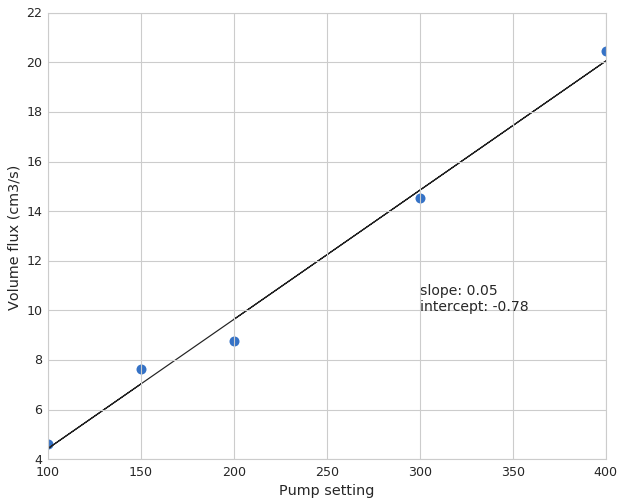

In [5]:
# Finally plot volume flux versus pump setting and get function fit
vol_flux = np.array(vol_flux)
pump_setting = np.array(pump_setting)

# get pump rate as line function of pump setting
a3, b3, _, _, _ = stats.linregress(pump_setting, vol_flux)
pump_rate_fit = pump_setting*a3 + b3
plt.figure(figsize=(10, 8))
plt.plot(pump_setting, vol_flux, 'o', markersize=10)
plt.plot(pump_setting, pump_rate_fit, '-', color='k')
plt.ylabel("Volume flux (cm3/s)")
plt.xlabel("Pump setting")
plt.text(300, 10, "slope: %.2f\nintercept: %.2f" %(a3, b3), fontsize=14)
plt.grid(True)